In [1]:
# read nc output from WAOM 10km run

import xarray as xr
import pandas as p
import numpy as np
import numpy.ma as ma
import cartopy.crs as ccrs
import matplotlib as mpl
# mpl.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

from datetime import datetime, timedelta

from netCDF4 import Dataset
from netCDF4 import num2date, date2num
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

import gsw

import pyresample


In [2]:
dg10 = xr.open_dataset("/scratch/project_2000789/boeiradi/waom10_frc/waom10extend_grd.nc")
lat_rho_10 = dg10.variables["lat_rho"]
lon_rho_10 = dg10.variables["lon_rho"]
dg10.close()

dg4 = xr.open_dataset("/scratch/project_2000789/boeiradi/waom4_frc/waom4extend_grd.nc")
lat_rho_4 = dg4.variables["lat_rho"]
lon_rho_4 = dg4.variables["lon_rho"]
dg4.close()

dg2 = xr.open_dataset("/scratch/project_2000339/boeiradi/waom2_frc/waom2extend_grd.nc")
lat_rho_2 = dg2.variables["lat_rho"]
lon_rho_2 = dg2.variables["lon_rho"]
dg2.close()



In [3]:
rho_grid=np.arange(26.,28.,0.05) # for sigma-0
len_rho_grid=len(rho_grid)

# figures
fig_path = '/users/boeiradi/COLD_project/postprocessing/figs/WMT/'

# plot with bars
width=.023

# convert to rate per year:
Dt = 1000/0.05

print(rho_grid[19],rho_grid[39])


26.950000000000014 27.950000000000028


In [4]:
# read WAOM10 WMT maps
# d10 = xr.open_dataset('/scratch/project_2000339/boeiradi/waom10extend_shflim_S_0.25Q/output_20yr_diag/Full_vint_WMTmaps.nc')
d10 = xr.open_dataset('/users/boeiradi/COLD_project/postprocessing/waom_notebook/WMT_framework/Full_vint_WMTmaps.nc')
salt_net_10 = d10.variables['map_salt_net']
salt_adv_10 = d10.variables['map_salt_adv']
salt_diff_10 = d10.variables['map_salt_diff']
salt_hdiff_10 = d10.variables['map_salt_hdiff']
salt_vdiff_10 = d10.variables['map_salt_vdiff']
salt_sfc_10 = d10.variables['map_salt_sfc']
d10.close()


In [5]:
# read WAOM4 WMT maps
d4 = xr.open_dataset('/scratch/project_2000789/boeiradi/waom4extend_shflim_S_0.25Q/output_yr10_diag/Full_vint_WMTmaps.nc')
salt_net_4 = d4.variables['map_salt_net']
salt_adv_4 = d4.variables['map_salt_adv']
salt_diff_4 = d4.variables['map_salt_diff']
salt_hdiff_4 = d4.variables['map_salt_hdiff']
salt_vdiff_4 = d4.variables['map_salt_vdiff']
salt_sfc_4 = d4.variables['map_salt_sfc']
d4.close()

In [6]:
# read WAOM4-NOTIDE WMT maps
d4 = xr.open_dataset('/scratch/project_2000789/boeiradi/waom4extend_shflim_S_0.25Q/output_yr10_notides_diag/Full_vint_WMTmaps.nc')
salt_net_4nt = d4.variables['map_salt_net']
salt_adv_4nt = d4.variables['map_salt_adv']
salt_diff_4nt = d4.variables['map_salt_diff']
salt_hdiff_4nt = d4.variables['map_salt_hdiff']
salt_vdiff_4nt = d4.variables['map_salt_vdiff']
salt_sfc_4nt = d4.variables['map_salt_sfc']
d4.close()

In [7]:
# read WAOM4-COARSE WMT maps
d4 = xr.open_dataset('/scratch/project_2000789/boeiradi/waom4extend_shflim_S_0.25Q/output_yr10_10km-bathy_diag/Full_vint_WMTmaps.nc')
salt_net_4c = d4.variables['map_salt_net']
salt_adv_4c = d4.variables['map_salt_adv']
salt_diff_4c = d4.variables['map_salt_diff']
salt_hdiff_4c = d4.variables['map_salt_hdiff']
salt_vdiff_4c = d4.variables['map_salt_vdiff']
salt_sfc_4c = d4.variables['map_salt_sfc']
d4.close()

In [8]:
# read WAOM2 WMT maps
d2 = xr.open_dataset('/scratch/project_2000339/boeiradi/waom2extend_shflim_S_0.25Q/output_yr5/Full_vint_WMTmaps.nc')
salt_net_2 = d2.variables['map_salt_net']
salt_adv_2 = d2.variables['map_salt_adv']
salt_diff_2 = d2.variables['map_salt_diff']
salt_hdiff_2 = d2.variables['map_salt_hdiff']
salt_vdiff_2 = d2.variables['map_salt_vdiff']
salt_sfc_2 = d2.variables['map_salt_sfc']
d2.close()

In [9]:
# read bottom temperature and currents from annual, 10km-interpolated netcdf file:
# --- created with /users/boeiradi/COLD_project/postprocessing/waom_notebook/Maps_validations/WAOM10x4x2extend_shflim_S_0.25Q_TSVel_botXsfc.py

dt = xr.open_dataset('/scratch/project_2000339/boeiradi/waom10extend_shflim_S_0.25Q/output_20yr_diag/WAOM10x4x2_Annual_bottom_temp_UV_maps.nc')
temp_ann_bot_10 = np.squeeze(dt.variables['temp_ann_bot_10'])
temp_ann_bot_4 = np.squeeze(dt.variables['temp_ann_bot_4'])
temp_ann_bot_4nt = np.squeeze(dt.variables['temp_ann_bot_4nt'])
temp_ann_bot_4c = np.squeeze(dt.variables['temp_ann_bot_4c'])
temp_ann_bot_2 = np.squeeze(dt.variables['temp_ann_bot_2'])

salt_ann_bot_10 = np.squeeze(dt.variables['salt_ann_bot_10'])
salt_ann_bot_4 = np.squeeze(dt.variables['salt_ann_bot_4'])
salt_ann_bot_4nt = np.squeeze(dt.variables['salt_ann_bot_4nt'])
salt_ann_bot_4c = np.squeeze(dt.variables['salt_ann_bot_4c'])
salt_ann_bot_2 = np.squeeze(dt.variables['salt_ann_bot_2'])

u_10_bot = np.squeeze(dt.variables['u_10_bot'])
v_10_bot = np.squeeze(dt.variables['v_10_bot'])
u_4_bot = np.squeeze(dt.variables['u_4_bot'])
v_4_bot = np.squeeze(dt.variables['v_4_bot'])
u_4nt_bot = np.squeeze(dt.variables['u_4nt_bot'])
v_4nt_bot = np.squeeze(dt.variables['v_4nt_bot'])
u_4c_bot = np.squeeze(dt.variables['u_4c_bot'])
v_4c_bot = np.squeeze(dt.variables['v_4c_bot'])
u_2_bot = np.squeeze(dt.variables['u_2_bot'])
v_2_bot = np.squeeze(dt.variables['v_2_bot'])

xs_10 = np.squeeze(dt.variables['xs_10'])
ys_10 = np.squeeze(dt.variables['ys_10'])
xs_4 = np.squeeze(dt.variables['xs_4'])
ys_4 = np.squeeze(dt.variables['ys_4'])
xs_2 = np.squeeze(dt.variables['xs_2'])
ys_2 = np.squeeze(dt.variables['ys_2'])

# z_rho_bot_10 = np.squeeze(dt.variables['z_rho_10_bot'])
# z_rho_bot_4 = np.squeeze(dt.variables['z_rho_4_bot'])
# z_rho_bot_2 = np.squeeze(dt.variables['z_rho_2_bot'])

Tf_bot_10 = np.squeeze(dt.variables['Tf_10_bot'])
Tf_bot_4 = np.squeeze(dt.variables['Tf_4_bot'])
Tf_bot_2 = np.squeeze(dt.variables['Tf_2_bot'])
Tf_sfc_10 = np.squeeze(dt.variables['Tf_10_sfc'])
Tf_sfc_4 = np.squeeze(dt.variables['Tf_4_sfc'])
Tf_sfc_2 = np.squeeze(dt.variables['Tf_2_sfc'])

dt.close()


In [10]:
### plot maps
import matplotlib.path as mpath
import cartopy.feature as cfeature

def lonlat_labels(ax):
    # latitude labels
    ax.text(120,-80,'80$^{\circ}$S',transform=ccrs.PlateCarree(),color='gray')
    ax.text(120,-70,'70$^{\circ}$S',transform=ccrs.PlateCarree(),color='gray')
    # longitude labels
    ax.text(0,-66,'0$^{\circ}$',transform=ccrs.PlateCarree(),color='gray')
    #ax.text(60,-53,'60$^{\circ}$E',transform=ccrs.PlateCarree(),color='gray')
    #ax.text(120,-53,'120$^{\circ}$E',transform=ccrs.PlateCarree(),color='gray')
    ax.text(-60,-48,'60$^{\circ}$W',transform=ccrs.PlateCarree(),color='gray')
    ax.text(-120,-48,'120$^{\circ}$W',transform=ccrs.PlateCarree(),color='gray')
    ax.text(180,-60,'180$^{\circ}$',transform=ccrs.PlateCarree(),color='gray')
    return

proj = ccrs.SouthPolarStereo()

di = xr.open_dataset('/scratch/project_2000339/boeiradi/waom2extend_shflim_S_0.25Q/output_yr5/ocean_avg_0001.nc')
ice_draft = di.variables["zice"]
h = di.variables["h"]


In [11]:
from xgcm import Grid

# Bottom velocity magnitude
V10_bot = np.sqrt(u_10_bot*u_10_bot + v_10_bot*v_10_bot)
V4_bot = np.sqrt(u_4_bot*u_4_bot + v_4_bot*v_4_bot)
V2_bot = np.sqrt(u_2_bot*u_2_bot + v_2_bot*v_2_bot)
V4c_bot = np.sqrt(u_4c_bot*u_4c_bot + v_4c_bot*v_4c_bot)
# re-grid 4km currents to 10km grid:
w10_def = pyresample.geometry.SwathDefinition(lons=lon_rho_10,lats=lat_rho_10)
w4_def = pyresample.geometry.SwathDefinition(lons=lon_rho_4,lats=lat_rho_4)
w2_def = pyresample.geometry.SwathDefinition(lons=lon_rho_2,lats=lat_rho_2)

wf = lambda r: 1/r

V4_bot_interp = pyresample.kd_tree.resample_custom(w4_def,V4_bot.values,w10_def,\
                                         radius_of_influence=30000,neighbours=4,weight_funcs=wf)
V2_bot_interp = pyresample.kd_tree.resample_custom(w2_def,V2_bot.values,w10_def,\
                                         radius_of_influence=5000,neighbours=1,weight_funcs=wf)
V4c_bot_interp = pyresample.kd_tree.resample_custom(w4_def,V4c_bot.values,w10_def,\
                                         radius_of_influence=30000,neighbours=4,weight_funcs=wf)

Tf_sfc_4_interp = pyresample.kd_tree.resample_custom(w4_def,Tf_sfc_4.values,w10_def,\
                                         radius_of_influence=30000,neighbours=4,weight_funcs=wf)

Tf_sfc_2_interp = pyresample.kd_tree.resample_custom(w2_def,Tf_sfc_2.values,w10_def,\
                                         radius_of_influence=5000,neighbours=1,weight_funcs=wf)


/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/pyresample/kd_tree.py:384: UserWarning: Possible more than 4 neighbours within 30000 m for some data points
  warnings.warn(('Possible more than %s neighbours '


In [12]:
Tf_bot_2.shape

(2800, 3150)

In [ ]:
# testing different projections

proj = ccrs.SouthPolarStereo()

fig = plt.figure(figsize=(18,12))

ax1 = fig.add_subplot(2,3,1, projection=proj)
ctf = plt.pcolormesh(lon_rho_10, lat_rho_10, Tf_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=-1.9, vmax=-1.5)
ax1.gridlines(zorder=4)
# ax.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax1.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') 
plt.title('WAOM10 surface')

ax2 = fig.add_subplot(2,3,2, projection=proj)
ctfa = plt.pcolormesh(lon_rho_10, lat_rho_10, Tf_sfc_4_interp - Tf_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-.2, vmax=.2)
ax2.gridlines(zorder=4)
# ax.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax2.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') 
plt.title('WAOM4 surface')

ax3 = fig.add_subplot(2,3,3, projection=proj)
ctfa = plt.pcolormesh(lon_rho_10, lat_rho_10, Tf_sfc_2_interp - Tf_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-.2, vmax=.2)
ax3.gridlines(zorder=4)
# ax.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax3.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') 
plt.title('WAOM2 surface')

# set colorbar
cbar_ax1 = fig.add_axes([0.05, 0.5, 0.01, 0.35])
fig.colorbar(ctf, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Freezing temperature ($^{\circ}$C)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)

cbar_ax2 = fig.add_axes([0.95, 0.5, 0.01, 0.35])
fig.colorbar(ctfa, cax=cbar_ax2, orientation='vertical')
cbar_ax2.set_ylabel('Freezing temperature anom. ($^{\circ}$C)', fontsize=17)#, labelpad=-35)
cbar_ax2.tick_params(labelsize=15)

ax1 = fig.add_subplot(2,3,4, projection=proj)
ctf = plt.pcolormesh(lon_rho_10, lat_rho_10, Tf_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=-1.9, vmax=-.5)
ax1.gridlines(zorder=4)
# ax.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax1.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') 
plt.title('WAOM10 bottom')

ax2 = fig.add_subplot(2,3,5, projection=proj)
ctf = plt.pcolormesh(lon_rho_4, lat_rho_4, Tf_bot_4, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=-1.9, vmax=-.5)
ax2.gridlines(zorder=4)
# ax.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax2.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') 
plt.title('WAOM4 bottom')

ax3 = fig.add_subplot(2,3,6, projection=proj)
ctf = plt.pcolormesh(lon_rho_2, lat_rho_2, Tf_bot_2, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma,  vmin=-1.9, vmax=-.5)
ax3.gridlines(zorder=4)
# ax.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax3.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') 
plt.title('WAOM2 bottom')

# set colorbar
cbar_ax2 = fig.add_axes([0.95, 0.1, 0.01, 0.35])
fig.colorbar(ctf, cax=cbar_ax2, orientation='vertical')
cbar_ax2.set_ylabel('Freezing temperature ($^{\circ}$C)', fontsize=17)#, labelpad=-35)
cbar_ax2.tick_params(labelsize=15)

In [ ]:
proj = ccrs.Mercator()

fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(1,1,1, projection=proj)
ctf = plt.pcolormesh(lon_rho_10, lat_rho_10, Tf_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=-2.5, vmax=-1.9)
ax1.gridlines(zorder=4)
ax1.set_extent([60, 150, -73, -64], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') 
plt.title('WAOM10 surface')
plt.colorbar()


In [ ]:
proj = ccrs.Mercator()

fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(1,1,1, projection=proj)
ctf = plt.pcolormesh(lon_rho_10, lat_rho_10, Tf_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=-2.5, vmax=-1.9)
ax1.gridlines(zorder=4)
ax1.set_extent([-140, -65, -76, -67], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') 
plt.title('WAOM10 surface')
plt.colorbar()

In [ ]:
### Figures for the paper:

# 1) FRIS: only show WAOM10 x WAOM4 x WAOM4-NOTIDE: upper row
# bottom temperature and annual currents: lower row

## plots FRIS

# integrated from 27.3:27.5 kg m-3:

# indexes [imin:imax]
imin=7
imax=11

salt_net_Wed_10 = np.nansum(np.squeeze(salt_net_10[imin:imax]), axis=0)
salt_net_Wed_4 = np.nansum(np.squeeze(salt_net_4[imin:imax]), axis=0)
salt_net_Wed_2 = np.nansum(np.squeeze(salt_net_2[imin:imax]), axis=0)
salt_net_Wed_4nt = np.nansum(np.squeeze(salt_net_4nt[imin:imax]), axis=0)
salt_net_Wed_4c = np.nansum(np.squeeze(salt_net_4c[imin:imax]), axis=0)

salt_adv_Wed_10 = np.nansum(np.squeeze(salt_adv_10[imin:imax]), axis=0)
salt_adv_Wed_4 = np.nansum(np.squeeze(salt_adv_4[imin:imax]), axis=0)
salt_adv_Wed_2 = np.nansum(np.squeeze(salt_adv_2[imin:imax]), axis=0)
salt_adv_Wed_4nt = np.nansum(np.squeeze(salt_adv_4nt[imin:imax]), axis=0)
salt_adv_Wed_4c = np.nansum(np.squeeze(salt_adv_4c[imin:imax]), axis=0)

salt_diff_Wed_10 = np.nansum(np.squeeze(salt_diff_10[imin:imax]), axis=0)
salt_diff_Wed_4 = np.nansum(np.squeeze(salt_diff_4[imin:imax]), axis=0)
salt_diff_Wed_2 = np.nansum(np.squeeze(salt_diff_2[imin:imax]), axis=0)
salt_diff_Wed_4nt = np.nansum(np.squeeze(salt_diff_4nt[imin:imax]), axis=0)
salt_diff_Wed_4c = np.nansum(np.squeeze(salt_diff_4c[imin:imax]), axis=0)

salt_vdiff_Wed_10 = np.nansum(np.squeeze(salt_vdiff_10[imin:imax]), axis=0)
salt_vdiff_Wed_4 = np.nansum(np.squeeze(salt_vdiff_4[imin:imax]), axis=0)
salt_vdiff_Wed_2 = np.nansum(np.squeeze(salt_vdiff_2[imin:imax]), axis=0)
salt_vdiff_Wed_4nt = np.nansum(np.squeeze(salt_vdiff_4nt[imin:imax]), axis=0)
salt_vdiff_Wed_4c = np.nansum(np.squeeze(salt_vdiff_4c[imin:imax]), axis=0)

salt_hdiff_Wed_10 = np.nansum(np.squeeze(salt_hdiff_10[imin:imax]), axis=0)
salt_hdiff_Wed_4 = np.nansum(np.squeeze(salt_hdiff_4[imin:imax]), axis=0)
salt_hdiff_Wed_2 = np.nansum(np.squeeze(salt_hdiff_2[imin:imax]), axis=0)
salt_hdiff_Wed_4nt = np.nansum(np.squeeze(salt_hdiff_4nt[imin:imax]), axis=0)
salt_hdiff_Wed_4c = np.nansum(np.squeeze(salt_hdiff_4c[imin:imax]), axis=0)

salt_sfc_Wed_10 = np.nansum(np.squeeze(salt_sfc_10[imin:imax]), axis=0)
salt_sfc_Wed_4 = np.nansum(np.squeeze(salt_sfc_4[imin:imax]), axis=0)
salt_sfc_Wed_2 = np.nansum(np.squeeze(salt_sfc_2[imin:imax]), axis=0)
salt_sfc_Wed_4nt = np.nansum(np.squeeze(salt_sfc_4nt[imin:imax]), axis=0)
salt_sfc_Wed_4c = np.nansum(np.squeeze(salt_sfc_4c[imin:imax]), axis=0)

# interpolate transformation maps to 10km grid to show difference:

#salt_vdiff_Wed_4
salt_vdiff_Wed_4_interp = pyresample.kd_tree.resample_custom(w4_def,salt_vdiff_Wed_4,w10_def,\
                                         radius_of_influence=300000,neighbours=10,weight_funcs=wf)
salt_vdiff_Wed_4nt_interp = pyresample.kd_tree.resample_custom(w4_def,salt_vdiff_Wed_4nt,w10_def,\
                                         radius_of_influence=300000,neighbours=10,weight_funcs=wf)


# limits for contour of ice front (Ronne-Filchner IS):
xlimit = np.arange(1500,2500,1)
ylimit = np.arange(500,1500,1)

## Final plots:
# [LHS]    NET - (ADV + HDIFF)   =   VDIFF + SFC_FLX   [RHS]

# scale for WMT rates:
scl = 1e4

fig = plt.figure(figsize=(18,16))

ax1 = fig.add_subplot(2,3,1, projection=proj)
plt.title('A) WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_vdiff_Wed_10*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
ax1.gridlines(zorder=4)
ax1.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')
plt.ylabel('WAOM10',fontsize=16)

ax2 = fig.add_subplot(2,3,2, projection=proj)
plt.title('B) WAOM4 - WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_vdiff_Wed_4_interp-salt_vdiff_Wed_10)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_Wed_4*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
ax2.gridlines(zorder=4)
ax2.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax3 = fig.add_subplot(2,3,3, projection=proj)
plt.title('C) WAOM4-NOTIDE - WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_vdiff_Wed_4nt_interp-salt_vdiff_Wed_10)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_Wed_4nt*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
ax3.gridlines(zorder=4)
ax3.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

# set colorbar
cbar_ax0 = fig.add_axes([0.05, 0.55, 0.01, 0.32])
fig.colorbar(cy, cax=cbar_ax0, orientation='vertical')
cbar_ax0.set_ylabel('Transformation rates (10$^{-4}$ m$^{3}$ s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax0.tick_params(labelsize=15)

# set colorbar diff
cbar_ax1 = fig.add_axes([0.92, 0.55, 0.01, 0.32])
fig.colorbar(cyd, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Transformation rates anomaly \n (10$^{-4}$ m$^{3}$ s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)

# temperature and currents (annual)
tmin=-3
tmax=0
# spacing for current vectors:
vs10=3
vs4=7
vs2=14

ax4 = fig.add_subplot(2,3,4, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
cv=ax4.quiver(xs_10[::vs10,::vs10],ys_10[::vs10,::vs10],u_10_bot[::vs10,::vs10],v_10_bot[::vs10,::vs10], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('D) WAOM10: \n Bottom temperature and currents', fontsize=16)
ax4.gridlines(zorder=4)
ax4.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

# for anomalies
atmin=-1
atmax=1

ax5 = fig.add_subplot(2,3,5, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_bot_4-temp_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
cv=ax5.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4_bot[::vs4,::vs4],v_4_bot[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('E) WAOM4 - WAOM10: \n Bottom temperature and currents', fontsize=16)
ax5.gridlines(zorder=4)
ax5.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax6 = fig.add_subplot(2,3,6, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_bot_4nt-temp_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
cv=ax6.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4nt_bot[::vs4,::vs4],v_4nt_bot[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('F) WAOM4-NOTIDE - WAOM10: \n Bottom temperature and currents', fontsize=16)
ax6.gridlines(zorder=4)
ax6.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

# set colorbar
cbar_ax2 = fig.add_axes([0.05, 0.15, 0.01, 0.32])
fig.colorbar(ct1, cax=cbar_ax2, orientation='vertical')
cbar_ax2.set_ylabel('Temperature ($^{\circ}$C)', fontsize=17)#, labelpad=-35)
cbar_ax2.tick_params(labelsize=15)

cbar_ax3 = fig.add_axes([0.92, 0.15, 0.01, 0.32])
fig.colorbar(ct2, cax=cbar_ax3, orientation='vertical')
cbar_ax3.set_ylabel('Temperature anomaly ($^{\circ}$C)', fontsize=17)#, labelpad=-35)
cbar_ax3.tick_params(labelsize=15)

name_fig="waom10x4x4nt_WMTmaps_Full_salt_tempVel_iceshelf_FRIS_27.3-27.5kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()


In [ ]:
# #salt_vdiff_Wed_4
# salt_vdiff_Wed_4_interp1 = pyresample.kd_tree.resample_custom(w4_def,salt_vdiff_Wed_4,w10_def,\
#                                          radius_of_influence=300000,neighbours=4,weight_funcs=wf)
# salt_vdiff_Wed_4_interp2 = pyresample.kd_tree.resample_custom(w4_def,salt_vdiff_Wed_4,w10_def,\
#                                          radius_of_influence=300000,neighbours=10,weight_funcs=wf)

# # scale for WMT rates:
# scl = 1e4

# fig = plt.figure(figsize=(18,16))

# ax1 = fig.add_subplot(2,3,1, projection=proj)
# plt.title('A) WAOM4: Total WMT ($D_t S$)', fontsize=16)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_Wed_4*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
# ax1.gridlines(zorder=4)
# ax1.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
# ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')
# plt.ylabel('WAOM10',fontsize=16)

# ax2 = fig.add_subplot(2,3,2, projection=proj)
# plt.title('B) testing interp 1', fontsize=16)
# cy=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_vdiff_Wed_4_interp1*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
# ax2.gridlines(zorder=4)
# ax2.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
# ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

# ax3 = fig.add_subplot(2,3,3, projection=proj)
# plt.title('C) testing interp 2', fontsize=16)
# cy=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_vdiff_Wed_4_interp2*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
# ax3.gridlines(zorder=4)
# ax3.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
# ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

# plt.show()

In [ ]:
### Figures for the paper:

# 2) East Antarctica: only show WAOM10 x WAOM4 x WAOM4-COARSE: upper row
# bottom temperature and annual currents: lower row

## plots EAnt


# integrated from 27.2:27.8 kg m-3: peak of buoyancy gain

# indexes [imin:imax]
imin=7
imax=17

salt_net_EAnt_10 = np.nansum(np.squeeze(salt_net_10[imin:imax]), axis=0)
salt_net_EAnt_4 = np.nansum(np.squeeze(salt_net_4[imin:imax]), axis=0)
salt_net_EAnt_2 = np.nansum(np.squeeze(salt_net_2[imin:imax]), axis=0)
salt_net_EAnt_4nt = np.nansum(np.squeeze(salt_net_4nt[imin:imax]), axis=0)
salt_net_EAnt_4c = np.nansum(np.squeeze(salt_net_4c[imin:imax]), axis=0)

salt_adv_EAnt_10 = np.nansum(np.squeeze(salt_adv_10[imin:imax]), axis=0)
salt_adv_EAnt_4 = np.nansum(np.squeeze(salt_adv_4[imin:imax]), axis=0)
salt_adv_EAnt_2 = np.nansum(np.squeeze(salt_adv_2[imin:imax]), axis=0)
salt_adv_EAnt_4nt = np.nansum(np.squeeze(salt_adv_4nt[imin:imax]), axis=0)
salt_adv_EAnt_4c = np.nansum(np.squeeze(salt_adv_4c[imin:imax]), axis=0)

salt_diff_EAnt_10 = np.nansum(np.squeeze(salt_diff_10[imin:imax]), axis=0)
salt_diff_EAnt_4 = np.nansum(np.squeeze(salt_diff_4[imin:imax]), axis=0)
salt_diff_EAnt_2 = np.nansum(np.squeeze(salt_diff_2[imin:imax]), axis=0)
salt_diff_EAnt_4nt = np.nansum(np.squeeze(salt_diff_4nt[imin:imax]), axis=0)
salt_diff_EAnt_4c = np.nansum(np.squeeze(salt_diff_4c[imin:imax]), axis=0)

salt_vdiff_EAnt_10 = np.nansum(np.squeeze(salt_vdiff_10[imin:imax]), axis=0)
salt_vdiff_EAnt_4 = np.nansum(np.squeeze(salt_vdiff_4[imin:imax]), axis=0)
salt_vdiff_EAnt_2 = np.nansum(np.squeeze(salt_vdiff_2[imin:imax]), axis=0)
salt_vdiff_EAnt_4nt = np.nansum(np.squeeze(salt_vdiff_4nt[imin:imax]), axis=0)
salt_vdiff_EAnt_4c = np.nansum(np.squeeze(salt_vdiff_4c[imin:imax]), axis=0)

salt_hdiff_EAnt_10 = np.nansum(np.squeeze(salt_hdiff_10[imin:imax]), axis=0)
salt_hdiff_EAnt_4 = np.nansum(np.squeeze(salt_hdiff_4[imin:imax]), axis=0)
salt_hdiff_EAnt_2 = np.nansum(np.squeeze(salt_hdiff_2[imin:imax]), axis=0)
salt_hdiff_EAnt_4nt = np.nansum(np.squeeze(salt_hdiff_4nt[imin:imax]), axis=0)
salt_hdiff_EAnt_4c = np.nansum(np.squeeze(salt_hdiff_4c[imin:imax]), axis=0)

salt_sfc_EAnt_10 = np.nansum(np.squeeze(salt_sfc_10[imin:imax]), axis=0)
salt_sfc_EAnt_4 = np.nansum(np.squeeze(salt_sfc_4[imin:imax]), axis=0)
salt_sfc_EAnt_2 = np.nansum(np.squeeze(salt_sfc_2[imin:imax]), axis=0)
salt_sfc_EAnt_4nt = np.nansum(np.squeeze(salt_sfc_4nt[imin:imax]), axis=0)
salt_sfc_EAnt_4c = np.nansum(np.squeeze(salt_sfc_4c[imin:imax]), axis=0)

# interpolate transformation maps to 10km grid to show difference:

#salt_vdiff_Wed_4
salt_vdiff_EAnt_4_interp = pyresample.kd_tree.resample_custom(w4_def,salt_vdiff_EAnt_4,w10_def,\
                                         radius_of_influence=300000,neighbours=10,weight_funcs=wf)
salt_vdiff_EAnt_4c_interp = pyresample.kd_tree.resample_custom(w4_def,salt_vdiff_EAnt_4c,w10_def,\
                                         radius_of_influence=300000,neighbours=10,weight_funcs=wf)

# limits for contour of ice front (East Antarctica):
xlimit = np.arange(250,2500,1)
ylimit = np.arange(2000,3000,1)

## Final plots:
# [LHS]    NET - (ADV + HDIFF)   =   VDIFF + SFC_FLX   [RHS]

# scale for WMT rates:
scl = 1e4

fig = plt.figure(figsize=(18,16))

ax1 = fig.add_subplot(2,3,1, projection=proj)
plt.title('A) WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_vdiff_EAnt_10*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1.5, vmax=1.5)
ax1.gridlines(zorder=4)
ax1.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)
plt.ylabel('WAOM10',fontsize=16)

ax2 = fig.add_subplot(2,3,2, projection=proj)
plt.title('B) WAOM4 - WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_vdiff_EAnt_4_interp-salt_vdiff_EAnt_10)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1.5, vmax=1.5)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_EAnt_4*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1.5, vmax=1.5)
ax2.gridlines(zorder=4)
ax2.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax3 = fig.add_subplot(2,3,3, projection=proj)
plt.title('C) WAOM4-COARSE - WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_vdiff_EAnt_4c_interp-salt_vdiff_EAnt_10)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1.5, vmax=1.5)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_EAnt_4c*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1.5, vmax=1.5)
ax3.gridlines(zorder=4)
ax3.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# set colorbar
cbar_ax0 = fig.add_axes([0.05, 0.55, 0.01, 0.32])
fig.colorbar(cy, cax=cbar_ax0, orientation='vertical')
cbar_ax0.set_ylabel('Transformation rates (10$^{-4}$ m$^{3}$ s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax0.tick_params(labelsize=15)

# set colorbar diff
cbar_ax1 = fig.add_axes([0.92, 0.55, 0.01, 0.32])
fig.colorbar(cyd, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Transformation rates anomaly \n (10$^{-4}$ m$^{3}$ s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)

# temperature and currents (annual)
tmin=-3
tmax=0

# spacing for current vectors:
vs10=5
vs4=12
vs2=24

ax4 = fig.add_subplot(2,3,4, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
cv=ax4.quiver(xs_10[::vs10,::vs10],ys_10[::vs10,::vs10],u_10_bot[::vs10,::vs10],v_10_bot[::vs10,::vs10], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('D) WAOM10: \n Bottom temperature and currents', fontsize=16)
ax4.gridlines(zorder=4)
ax4.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# for anomalies
atmin=-1
atmax=1

ax5 = fig.add_subplot(2,3,5, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_bot_4-temp_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
cv=ax5.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4_bot[::vs4,::vs4],v_4_bot[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('E) WAOM4 - WAOM10: \n Bottom temperature and currents', fontsize=16)
ax5.gridlines(zorder=4)
ax5.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax6 = fig.add_subplot(2,3,6, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_bot_4c-temp_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
cv=ax6.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4c_bot[::vs4,::vs4],v_4c_bot[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('F) WAOM4-COARSE - WAOM10: \n Bottom temperature and currents', fontsize=16)
ax6.gridlines(zorder=4)
ax6.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

## set colorbar
cbar_ax2 = fig.add_axes([0.05, 0.15, 0.01, 0.32])
fig.colorbar(ct1, cax=cbar_ax2, orientation='vertical')
cbar_ax2.set_ylabel('Temperature ($^{\circ}$C)', fontsize=17)#, labelpad=-35)
cbar_ax2.tick_params(labelsize=15)

cbar_ax3 = fig.add_axes([0.92, 0.15, 0.01, 0.32])
fig.colorbar(ct2, cax=cbar_ax3, orientation='vertical')
cbar_ax3.set_ylabel('Temperature anomaly ($^{\circ}$C)', fontsize=17)#, labelpad=-35)
cbar_ax3.tick_params(labelsize=15)

name_fig="waom10x4x4c_WMTmaps_Full_salt_tempVel_iceshelf_EAnt_27.2-27.8kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()


In [ ]:
### Figures for the paper:

# 2) East Antarctica: only show WAOM10 x WAOM4 x WAOM4-COARSE: upper row
# bottom temperature and annual currents: lower row

## plots EAnt


# integrated from 27.2:27.8 kg m-3: peak of buoyancy gain

# indexes [imin:imax]
imin=7
imax=17

salt_net_EAnt_10 = np.nansum(np.squeeze(salt_net_10[imin:imax]), axis=0)
salt_net_EAnt_4 = np.nansum(np.squeeze(salt_net_4[imin:imax]), axis=0)
salt_net_EAnt_2 = np.nansum(np.squeeze(salt_net_2[imin:imax]), axis=0)
salt_net_EAnt_4nt = np.nansum(np.squeeze(salt_net_4nt[imin:imax]), axis=0)
salt_net_EAnt_4c = np.nansum(np.squeeze(salt_net_4c[imin:imax]), axis=0)

salt_adv_EAnt_10 = np.nansum(np.squeeze(salt_adv_10[imin:imax]), axis=0)
salt_adv_EAnt_4 = np.nansum(np.squeeze(salt_adv_4[imin:imax]), axis=0)
salt_adv_EAnt_2 = np.nansum(np.squeeze(salt_adv_2[imin:imax]), axis=0)
salt_adv_EAnt_4nt = np.nansum(np.squeeze(salt_adv_4nt[imin:imax]), axis=0)
salt_adv_EAnt_4c = np.nansum(np.squeeze(salt_adv_4c[imin:imax]), axis=0)

salt_diff_EAnt_10 = np.nansum(np.squeeze(salt_diff_10[imin:imax]), axis=0)
salt_diff_EAnt_4 = np.nansum(np.squeeze(salt_diff_4[imin:imax]), axis=0)
salt_diff_EAnt_2 = np.nansum(np.squeeze(salt_diff_2[imin:imax]), axis=0)
salt_diff_EAnt_4nt = np.nansum(np.squeeze(salt_diff_4nt[imin:imax]), axis=0)
salt_diff_EAnt_4c = np.nansum(np.squeeze(salt_diff_4c[imin:imax]), axis=0)

salt_vdiff_EAnt_10 = np.nansum(np.squeeze(salt_vdiff_10[imin:imax]), axis=0)
salt_vdiff_EAnt_4 = np.nansum(np.squeeze(salt_vdiff_4[imin:imax]), axis=0)
salt_vdiff_EAnt_2 = np.nansum(np.squeeze(salt_vdiff_2[imin:imax]), axis=0)
salt_vdiff_EAnt_4nt = np.nansum(np.squeeze(salt_vdiff_4nt[imin:imax]), axis=0)
salt_vdiff_EAnt_4c = np.nansum(np.squeeze(salt_vdiff_4c[imin:imax]), axis=0)

salt_hdiff_EAnt_10 = np.nansum(np.squeeze(salt_hdiff_10[imin:imax]), axis=0)
salt_hdiff_EAnt_4 = np.nansum(np.squeeze(salt_hdiff_4[imin:imax]), axis=0)
salt_hdiff_EAnt_2 = np.nansum(np.squeeze(salt_hdiff_2[imin:imax]), axis=0)
salt_hdiff_EAnt_4nt = np.nansum(np.squeeze(salt_hdiff_4nt[imin:imax]), axis=0)
salt_hdiff_EAnt_4c = np.nansum(np.squeeze(salt_hdiff_4c[imin:imax]), axis=0)

salt_sfc_EAnt_10 = np.nansum(np.squeeze(salt_sfc_10[imin:imax]), axis=0)
salt_sfc_EAnt_4 = np.nansum(np.squeeze(salt_sfc_4[imin:imax]), axis=0)
salt_sfc_EAnt_2 = np.nansum(np.squeeze(salt_sfc_2[imin:imax]), axis=0)
salt_sfc_EAnt_4nt = np.nansum(np.squeeze(salt_sfc_4nt[imin:imax]), axis=0)
salt_sfc_EAnt_4c = np.nansum(np.squeeze(salt_sfc_4c[imin:imax]), axis=0)


# limits for contour of ice front (East Antarctica):
xlimit = np.arange(250,2500,1)
ylimit = np.arange(2000,3000,1)

## Final plots:
# [LHS]    NET - (ADV + HDIFF)   =   VDIFF + SFC_FLX   [RHS]

# scale for WMT rates:
scl = 1e4

fig = plt.figure(figsize=(18,16))

ax1 = fig.add_subplot(2,3,1, projection=proj)
plt.title('A) WAOM10: Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_vdiff_EAnt_10*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
ax1.gridlines(zorder=4)
ax1.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)
plt.ylabel('WAOM10',fontsize=16)

ax2 = fig.add_subplot(2,3,2, projection=proj)
plt.title('B) WAOM4 - WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_vdiff_EAnt_4_interp-salt_vdiff_EAnt_10)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1.5, vmax=1.5)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_EAnt_4*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1.5, vmax=1.5)
ax2.gridlines(zorder=4)
ax2.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax3 = fig.add_subplot(2,3,3, projection=proj)
plt.title('C) WAOM4-COARSE - WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_vdiff_EAnt_4c_interp-salt_vdiff_EAnt_10)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1.5, vmax=1.5)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_EAnt_4c*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1.5, vmax=1.5)
ax3.gridlines(zorder=4)
ax3.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# set colorbar
cbar_ax0 = fig.add_axes([0.05, 0.55, 0.01, 0.32])
fig.colorbar(cy, cax=cbar_ax0, orientation='vertical')
cbar_ax0.set_ylabel('Transformation rates (10$^{-4}$ m$^{3}$ s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax0.tick_params(labelsize=15)

# set colorbar diff
cbar_ax1 = fig.add_axes([0.92, 0.55, 0.01, 0.32])
fig.colorbar(cyd, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Transformation rates anomaly \n (10$^{-4}$ m$^{3}$ s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)

# temperature and currents (annual)
tmin=34.2
tmax=35

# spacing for current vectors:
vs10=5
vs4=12
vs2=24

ax4 = fig.add_subplot(2,3,4, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
cv=ax4.quiver(xs_10[::vs10,::vs10],ys_10[::vs10,::vs10],u_10_bot[::vs10,::vs10],v_10_bot[::vs10,::vs10], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('D) WAOM10: \n Bottom salinity and currents', fontsize=16)
ax4.gridlines(zorder=4)
ax4.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# for anomalies
atmin=-.2
atmax=.2

ax5 = fig.add_subplot(2,3,5, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_bot_4-salt_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
cv=ax5.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4_bot[::vs4,::vs4],v_4_bot[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('E) WAOM4 - WAOM10: \n Bottom salinity and currents', fontsize=16)
ax5.gridlines(zorder=4)
ax5.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax6 = fig.add_subplot(2,3,6, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_bot_4c-salt_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
cv=ax6.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4c_bot[::vs4,::vs4],v_4c_bot[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('F) WAOM4-COARSE - WAOM10: \n Bottom salinity and currents', fontsize=16)
ax6.gridlines(zorder=4)
ax6.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

## set colorbar
cbar_ax2 = fig.add_axes([0.05, 0.15, 0.01, 0.32])
fig.colorbar(ct1, cax=cbar_ax2, orientation='vertical')
cbar_ax2.set_ylabel('Salinity', fontsize=17)#, labelpad=-35)
cbar_ax2.tick_params(labelsize=15)

cbar_ax3 = fig.add_axes([0.92, 0.15, 0.01, 0.32])
fig.colorbar(ct2, cax=cbar_ax3, orientation='vertical')
cbar_ax3.set_ylabel('Salinity anomaly', fontsize=17)#, labelpad=-35)
cbar_ax3.tick_params(labelsize=15)

name_fig="waom10x4x4c_WMTmaps_Full_salt_saltVel_iceshelf_EAnt_27.2-27.8kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()


In [ ]:
# limits for contour of ice front (East Antarctica):
xlimit = np.arange(250,2500,1)
ylimit = np.arange(2000,3000,1)

# scale for WMT rates:
scl = 1e4


fig = plt.figure(figsize=(18,8))

# currents (annual)
tmin=0
tmax=.2

# spacing for current vectors:
vs10=5
vs4=12


ax4 = fig.add_subplot(1,3,1, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,V10_bot, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
# cv=ax4.quiver(xs_10[::vs10,::vs10],ys_10[::vs10,::vs10],u_10_bot[::vs10,::vs10],v_10_bot[::vs10,::vs10], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('A) WAOM10: \n Bottom currents', fontsize=16)
ax4.gridlines(zorder=4)
ax4.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# for anomalies
atmin=-.05
atmax=.05

ax5 = fig.add_subplot(1,3,2, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,V4_bot_interp-V10_bot, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
# cv=ax5.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4_bot[::vs4,::vs4],v_4_bot[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('B) WAOM4 - WAOM10: \n Bottom  currents', fontsize=16)
ax5.gridlines(zorder=4)
ax5.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax6 = fig.add_subplot(1,3,3, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,V4c_bot_interp-V10_bot, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
# cv=ax6.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4c_bot[::vs4,::vs4],v_4c_bot[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('C) WAOM4-COARSE - WAOM10: \n Bottom currents', fontsize=16)
ax6.gridlines(zorder=4)
ax6.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

## set colorbar
cbar_ax2 = fig.add_axes([0.05, 0.15, 0.01, 0.72])
fig.colorbar(ct1, cax=cbar_ax2, orientation='vertical')
cbar_ax2.set_ylabel('Currents (m/s)', fontsize=17)#, labelpad=-35)
cbar_ax2.tick_params(labelsize=15)

cbar_ax3 = fig.add_axes([0.92, 0.15, 0.01, 0.72])
fig.colorbar(ct2, cax=cbar_ax3, orientation='vertical')
cbar_ax3.set_ylabel('Currents anomaly (m/s)', fontsize=17)#, labelpad=-35)
cbar_ax3.tick_params(labelsize=15)

name_fig="waom10x4x4c_WMTmaps_Full_salt_Vel_iceshelf_EAnt_27.2-27.8kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()

/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/pyresample/kd_tree.py:384: UserWarning: Possible more than 10 neighbours within 300000 m for some data points
  warnings.warn(('Possible more than %s neighbours '
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.ax

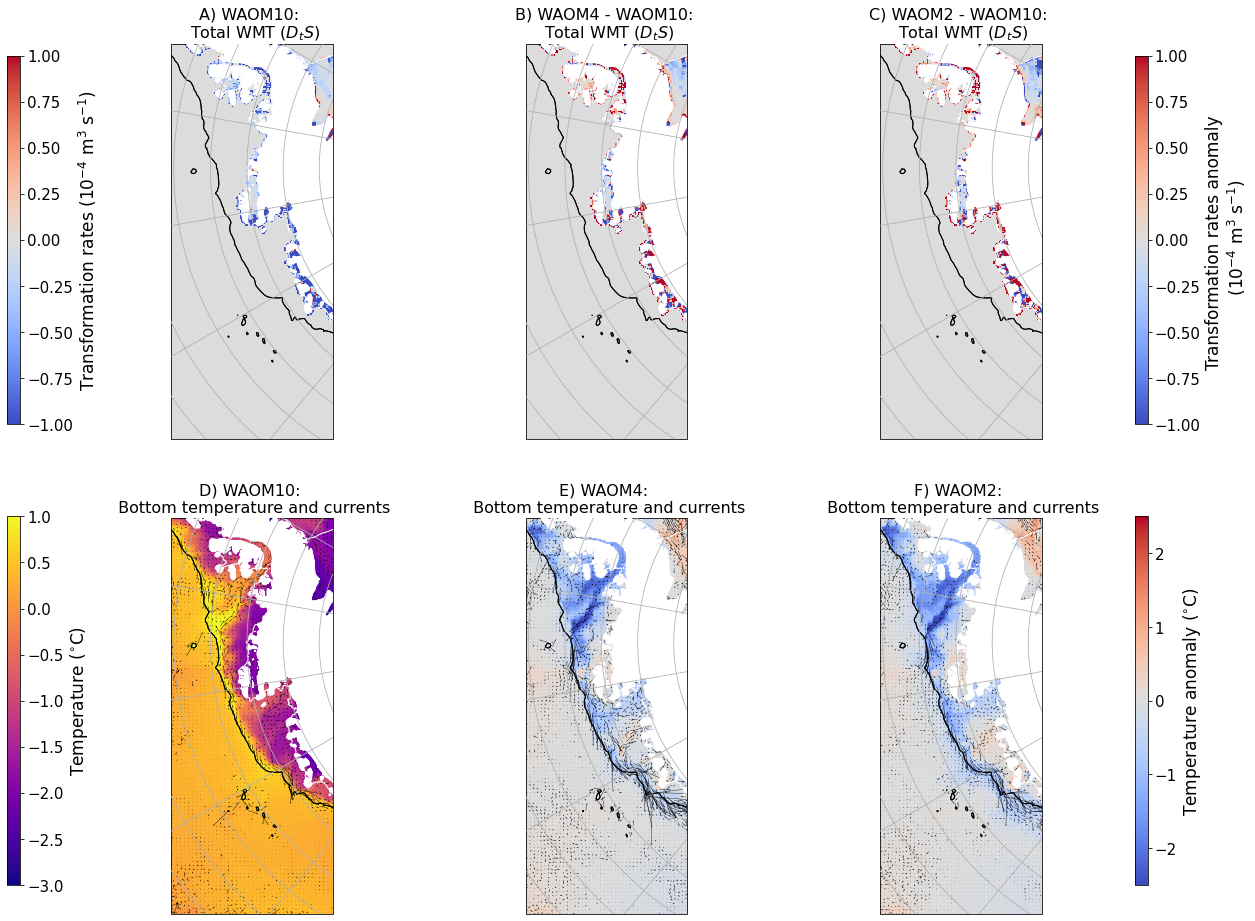

In [13]:
### Figures for the paper:

# 3) West Antarctica: only show WAOM10 x WAOM4 x WAOM2: upper row
# bottom temperature and annual currents: lower row

## plots WAnt


# integrated from 27.2:27.8 kg m-3: peak of buoyancy gain

# indexes [imin:imax]
imin=7
imax=17

salt_net_WAnt_10 = np.nansum(np.squeeze(salt_net_10[imin:imax]), axis=0)
salt_net_WAnt_4 = np.nansum(np.squeeze(salt_net_4[imin:imax]), axis=0)
salt_net_WAnt_2 = np.nansum(np.squeeze(salt_net_2[imin:imax]), axis=0)
salt_net_WAnt_4nt = np.nansum(np.squeeze(salt_net_4nt[imin:imax]), axis=0)
salt_net_WAnt_4c = np.nansum(np.squeeze(salt_net_4c[imin:imax]), axis=0)

salt_adv_WAnt_10 = np.nansum(np.squeeze(salt_adv_10[imin:imax]), axis=0)
salt_adv_WAnt_4 = np.nansum(np.squeeze(salt_adv_4[imin:imax]), axis=0)
salt_adv_WAnt_2 = np.nansum(np.squeeze(salt_adv_2[imin:imax]), axis=0)
salt_adv_WAnt_4nt = np.nansum(np.squeeze(salt_adv_4nt[imin:imax]), axis=0)
salt_adv_WAnt_4c = np.nansum(np.squeeze(salt_adv_4c[imin:imax]), axis=0)

salt_diff_WAnt_10 = np.nansum(np.squeeze(salt_diff_10[imin:imax]), axis=0)
salt_diff_WAnt_4 = np.nansum(np.squeeze(salt_diff_4[imin:imax]), axis=0)
salt_diff_WAnt_2 = np.nansum(np.squeeze(salt_diff_2[imin:imax]), axis=0)
salt_diff_WAnt_4nt = np.nansum(np.squeeze(salt_diff_4nt[imin:imax]), axis=0)
salt_diff_WAnt_4c = np.nansum(np.squeeze(salt_diff_4c[imin:imax]), axis=0)

salt_vdiff_WAnt_10 = np.nansum(np.squeeze(salt_vdiff_10[imin:imax]), axis=0)
salt_vdiff_WAnt_4 = np.nansum(np.squeeze(salt_vdiff_4[imin:imax]), axis=0)
salt_vdiff_WAnt_2 = np.nansum(np.squeeze(salt_vdiff_2[imin:imax]), axis=0)
salt_vdiff_WAnt_4nt = np.nansum(np.squeeze(salt_vdiff_4nt[imin:imax]), axis=0)
salt_vdiff_WAnt_4c = np.nansum(np.squeeze(salt_vdiff_4c[imin:imax]), axis=0)

salt_hdiff_WAnt_10 = np.nansum(np.squeeze(salt_hdiff_10[imin:imax]), axis=0)
salt_hdiff_WAnt_4 = np.nansum(np.squeeze(salt_hdiff_4[imin:imax]), axis=0)
salt_hdiff_WAnt_2 = np.nansum(np.squeeze(salt_hdiff_2[imin:imax]), axis=0)
salt_hdiff_WAnt_4nt = np.nansum(np.squeeze(salt_hdiff_4nt[imin:imax]), axis=0)
salt_hdiff_WAnt_4c = np.nansum(np.squeeze(salt_hdiff_4c[imin:imax]), axis=0)

salt_sfc_WAnt_10 = np.nansum(np.squeeze(salt_sfc_10[imin:imax]), axis=0)
salt_sfc_WAnt_4 = np.nansum(np.squeeze(salt_sfc_4[imin:imax]), axis=0)
salt_sfc_WAnt_2 = np.nansum(np.squeeze(salt_sfc_2[imin:imax]), axis=0)
salt_sfc_WAnt_4nt = np.nansum(np.squeeze(salt_sfc_4nt[imin:imax]), axis=0)
salt_sfc_WAnt_4c = np.nansum(np.squeeze(salt_sfc_4c[imin:imax]), axis=0)

# interpolate transformation maps to 10km grid to show difference:

#salt_vdiff_Wed_4
salt_vdiff_WAnt_4_interp = pyresample.kd_tree.resample_custom(w4_def,salt_vdiff_WAnt_4,w10_def,\
                                         radius_of_influence=300000,neighbours=10,weight_funcs=wf)
salt_vdiff_WAnt_2_interp = pyresample.kd_tree.resample_custom(w2_def,salt_vdiff_WAnt_2,w10_def,\
                                         radius_of_influence=5000,neighbours=1,weight_funcs=wf)


# limits for contour of ice front (West Antarct. IS):
xlimit = np.arange(500,2800,1)
ylimit = np.arange(250,1250,1)

## Final plots:
# [LHS]    NET - (ADV + HDIFF)   =   VDIFF + SFC_FLX   [RHS]

# scale for WMT rates:
scl = 1e4

fig = plt.figure(figsize=(18,16))

ax1 = fig.add_subplot(2,3,1, projection=proj)
plt.title('A) WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_vdiff_WAnt_10*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
ax1.gridlines(zorder=4)
ax1.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)
plt.ylabel('WAOM10',fontsize=16)

ax2 = fig.add_subplot(2,3,2, projection=proj)
plt.title('B) WAOM4 - WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_vdiff_WAnt_4_interp-salt_vdiff_WAnt_10)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_WAnt_4*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
ax2.gridlines(zorder=4)
ax2.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax3 = fig.add_subplot(2,3,3, projection=proj)
plt.title('C) WAOM2 - WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_vdiff_WAnt_2_interp-salt_vdiff_WAnt_10)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
# cy=plt.pcolormesh(lon_rho_2,lat_rho_2,salt_vdiff_WAnt_2*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
ax3.gridlines(zorder=4)
ax3.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# set colorbar
cbar_ax0 = fig.add_axes([0.05, 0.55, 0.01, 0.32])
fig.colorbar(cy, cax=cbar_ax0, orientation='vertical')
cbar_ax0.set_ylabel('Transformation rates (10$^{-4}$ m$^{3}$ s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax0.tick_params(labelsize=15)

# set colorbar diff
cbar_ax1 = fig.add_axes([0.92, 0.55, 0.01, 0.32])
fig.colorbar(cyd, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Transformation rates anomaly \n (10$^{-4}$ m$^{3}$ s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)


# temperature and currents (annual)
tmin=-3
tmax=1
# spacing for current vectors:
vs10=3
vs4=7
vs2=14

ax4 = fig.add_subplot(2,3,4, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
cv=ax4.quiver(xs_10[::vs10,::vs10],ys_10[::vs10,::vs10],u_10_bot[::vs10,::vs10],v_10_bot[::vs10,::vs10], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('D) WAOM10: \n Bottom temperature and currents', fontsize=16)
ax4.gridlines(zorder=4)
ax4.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# for anomalies:
atmin=-2.5
atmax=2.5

ax5 = fig.add_subplot(2,3,5, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_bot_4-temp_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
cv=ax5.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4_bot[::vs4,::vs4],v_4_bot[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('E) WAOM4: \n Bottom temperature and currents', fontsize=16)
ax5.gridlines(zorder=4)
ax5.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax6 = fig.add_subplot(2,3,6, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_bot_2-temp_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
cv=ax6.quiver(xs_2[::vs2,::vs2],ys_2[::vs2,::vs2],u_2_bot[::vs2,::vs2],v_2_bot[::vs2,::vs2], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('F) WAOM2: \n Bottom temperature and currents', fontsize=16)
ax6.gridlines(zorder=4)
ax6.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND, zorder=3, facecolor='white')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# set colorbar
cbar_ax2 = fig.add_axes([0.05, 0.15, 0.01, 0.32])
fig.colorbar(ct1, cax=cbar_ax2, orientation='vertical')
cbar_ax2.set_ylabel('Temperature ($^{\circ}$C)', fontsize=17)#, labelpad=-35)
cbar_ax2.tick_params(labelsize=15)

cbar_ax3 = fig.add_axes([0.92, 0.15, 0.01, 0.32])
fig.colorbar(ct2, cax=cbar_ax3, orientation='vertical')
cbar_ax3.set_ylabel('Temperature anomaly ($^{\circ}$C)', fontsize=17)#, labelpad=-35)
cbar_ax3.tick_params(labelsize=15)

# name_fig="waom10x4x2_WMTmaps_Full_salt_tempVel_iceshelf_WAnt_27.2-27.8kgm-3.png"
# plt.savefig(fig_path + name_fig, dpi=300)
plt.show()


In [ ]:
### Figures for the paper:

# 3) West Antarctica: only show WAOM10 x WAOM4 x WAOM2: upper row
# bottom salinity and annual currents: lower row

## plots WAnt


# integrated from 27.2:27.8 kg m-3: peak of buoyancy gain

# indexes [imin:imax]
imin=7
imax=17

salt_net_WAnt_10 = np.nansum(np.squeeze(salt_net_10[imin:imax]), axis=0)
salt_net_WAnt_4 = np.nansum(np.squeeze(salt_net_4[imin:imax]), axis=0)
salt_net_WAnt_2 = np.nansum(np.squeeze(salt_net_2[imin:imax]), axis=0)
salt_net_WAnt_4nt = np.nansum(np.squeeze(salt_net_4nt[imin:imax]), axis=0)
salt_net_WAnt_4c = np.nansum(np.squeeze(salt_net_4c[imin:imax]), axis=0)

salt_adv_WAnt_10 = np.nansum(np.squeeze(salt_adv_10[imin:imax]), axis=0)
salt_adv_WAnt_4 = np.nansum(np.squeeze(salt_adv_4[imin:imax]), axis=0)
salt_adv_WAnt_2 = np.nansum(np.squeeze(salt_adv_2[imin:imax]), axis=0)
salt_adv_WAnt_4nt = np.nansum(np.squeeze(salt_adv_4nt[imin:imax]), axis=0)
salt_adv_WAnt_4c = np.nansum(np.squeeze(salt_adv_4c[imin:imax]), axis=0)

salt_diff_WAnt_10 = np.nansum(np.squeeze(salt_diff_10[imin:imax]), axis=0)
salt_diff_WAnt_4 = np.nansum(np.squeeze(salt_diff_4[imin:imax]), axis=0)
salt_diff_WAnt_2 = np.nansum(np.squeeze(salt_diff_2[imin:imax]), axis=0)
salt_diff_WAnt_4nt = np.nansum(np.squeeze(salt_diff_4nt[imin:imax]), axis=0)
salt_diff_WAnt_4c = np.nansum(np.squeeze(salt_diff_4c[imin:imax]), axis=0)

salt_vdiff_WAnt_10 = np.nansum(np.squeeze(salt_vdiff_10[imin:imax]), axis=0)
salt_vdiff_WAnt_4 = np.nansum(np.squeeze(salt_vdiff_4[imin:imax]), axis=0)
salt_vdiff_WAnt_2 = np.nansum(np.squeeze(salt_vdiff_2[imin:imax]), axis=0)
salt_vdiff_WAnt_4nt = np.nansum(np.squeeze(salt_vdiff_4nt[imin:imax]), axis=0)
salt_vdiff_WAnt_4c = np.nansum(np.squeeze(salt_vdiff_4c[imin:imax]), axis=0)

salt_hdiff_WAnt_10 = np.nansum(np.squeeze(salt_hdiff_10[imin:imax]), axis=0)
salt_hdiff_WAnt_4 = np.nansum(np.squeeze(salt_hdiff_4[imin:imax]), axis=0)
salt_hdiff_WAnt_2 = np.nansum(np.squeeze(salt_hdiff_2[imin:imax]), axis=0)
salt_hdiff_WAnt_4nt = np.nansum(np.squeeze(salt_hdiff_4nt[imin:imax]), axis=0)
salt_hdiff_WAnt_4c = np.nansum(np.squeeze(salt_hdiff_4c[imin:imax]), axis=0)

salt_sfc_WAnt_10 = np.nansum(np.squeeze(salt_sfc_10[imin:imax]), axis=0)
salt_sfc_WAnt_4 = np.nansum(np.squeeze(salt_sfc_4[imin:imax]), axis=0)
salt_sfc_WAnt_2 = np.nansum(np.squeeze(salt_sfc_2[imin:imax]), axis=0)
salt_sfc_WAnt_4nt = np.nansum(np.squeeze(salt_sfc_4nt[imin:imax]), axis=0)
salt_sfc_WAnt_4c = np.nansum(np.squeeze(salt_sfc_4c[imin:imax]), axis=0)

# limits for contour of ice front (West Antarct. IS):
xlimit = np.arange(500,2800,1)
ylimit = np.arange(250,1250,1)

## Final plots:
# [LHS]    NET - (ADV + HDIFF)   =   VDIFF + SFC_FLX   [RHS]

# scale for WMT rates:
scl = 1e4

fig = plt.figure(figsize=(18,16))

ax1 = fig.add_subplot(2,3,1, projection=proj)
plt.title('A) WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_vdiff_WAnt_10*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
ax1.gridlines(zorder=4)
ax1.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)
plt.ylabel('WAOM10',fontsize=16)

ax2 = fig.add_subplot(2,3,2, projection=proj)
plt.title('B) WAOM4 - WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_vdiff_WAnt_4_interp-salt_vdiff_WAnt_10)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_WAnt_4*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
ax2.gridlines(zorder=4)
ax2.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax3 = fig.add_subplot(2,3,3, projection=proj)
plt.title('C) WAOM2 - WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_vdiff_WAnt_2_interp-salt_vdiff_WAnt_10)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
# cy=plt.pcolormesh(lon_rho_2,lat_rho_2,salt_vdiff_WAnt_2*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
ax3.gridlines(zorder=4)
ax3.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# set colorbar
cbar_ax0 = fig.add_axes([0.05, 0.55, 0.01, 0.32])
fig.colorbar(cy, cax=cbar_ax0, orientation='vertical')
cbar_ax0.set_ylabel('Transformation rates (10$^{-4}$ m$^{3}$ s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax0.tick_params(labelsize=15)

# set colorbar diff
cbar_ax1 = fig.add_axes([0.92, 0.55, 0.01, 0.32])
fig.colorbar(cyd, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Transformation rates anomaly \n (10$^{-4}$ m$^{3}$ s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)


# salinity and currents (annual)
tmin=34.2
tmax=35
# spacing for current vectors:
vs10=3
vs4=7
vs2=14

ax4 = fig.add_subplot(2,3,4, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
cv=ax4.quiver(xs_10[::vs10,::vs10],ys_10[::vs10,::vs10],u_10_bot[::vs10,::vs10],v_10_bot[::vs10,::vs10], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('D) WAOM10: \n Bottom salinity and currents', fontsize=16)
ax4.gridlines(zorder=4)
ax4.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# for anomalies:
atmin=-.2
atmax=.2

ax5 = fig.add_subplot(2,3,5, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_bot_4-salt_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
cv=ax5.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4_bot[::vs4,::vs4],v_4_bot[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('E) WAOM4: \n Bottom salinity and currents', fontsize=16)
ax5.gridlines(zorder=4)
ax5.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax6 = fig.add_subplot(2,3,6, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_bot_2-salt_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
cv=ax6.quiver(xs_2[::vs2,::vs2],ys_2[::vs2,::vs2],u_2_bot[::vs2,::vs2],v_2_bot[::vs2,::vs2], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('F) WAOM2: \n Bottom salinity and currents', fontsize=16)
ax6.gridlines(zorder=4)
ax6.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND, zorder=3, facecolor='white')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# set colorbar
cbar_ax2 = fig.add_axes([0.05, 0.15, 0.01, 0.32])
fig.colorbar(ct1, cax=cbar_ax2, orientation='vertical')
cbar_ax2.set_ylabel('Salinity', fontsize=17)#, labelpad=-35)
cbar_ax2.tick_params(labelsize=15)

cbar_ax3 = fig.add_axes([0.92, 0.15, 0.01, 0.32])
fig.colorbar(ct2, cax=cbar_ax3, orientation='vertical')
cbar_ax3.set_ylabel('Salinity anomaly', fontsize=17)#, labelpad=-35)
cbar_ax3.tick_params(labelsize=15)

name_fig="waom10x4x2_WMTmaps_Full_salt_saltVel_iceshelf_WAnt_27.2-27.8kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()


In [ ]:
### Figures for the paper:

# 3) West Antarctica: only show WAOM10 x WAOM4 x WAOM2: upper row
# bottom salinity and annual currents: lower row

## plots WAnt


# integrated from 27.2:27.8 kg m-3: peak of buoyancy gain

# indexes [imin:imax]
imin=7
imax=17

salt_net_WAnt_10 = np.nansum(np.squeeze(salt_net_10[imin:imax]), axis=0)
salt_net_WAnt_4 = np.nansum(np.squeeze(salt_net_4[imin:imax]), axis=0)
salt_net_WAnt_2 = np.nansum(np.squeeze(salt_net_2[imin:imax]), axis=0)
salt_net_WAnt_4nt = np.nansum(np.squeeze(salt_net_4nt[imin:imax]), axis=0)
salt_net_WAnt_4c = np.nansum(np.squeeze(salt_net_4c[imin:imax]), axis=0)

salt_adv_WAnt_10 = np.nansum(np.squeeze(salt_adv_10[imin:imax]), axis=0)
salt_adv_WAnt_4 = np.nansum(np.squeeze(salt_adv_4[imin:imax]), axis=0)
salt_adv_WAnt_2 = np.nansum(np.squeeze(salt_adv_2[imin:imax]), axis=0)
salt_adv_WAnt_4nt = np.nansum(np.squeeze(salt_adv_4nt[imin:imax]), axis=0)
salt_adv_WAnt_4c = np.nansum(np.squeeze(salt_adv_4c[imin:imax]), axis=0)

salt_diff_WAnt_10 = np.nansum(np.squeeze(salt_diff_10[imin:imax]), axis=0)
salt_diff_WAnt_4 = np.nansum(np.squeeze(salt_diff_4[imin:imax]), axis=0)
salt_diff_WAnt_2 = np.nansum(np.squeeze(salt_diff_2[imin:imax]), axis=0)
salt_diff_WAnt_4nt = np.nansum(np.squeeze(salt_diff_4nt[imin:imax]), axis=0)
salt_diff_WAnt_4c = np.nansum(np.squeeze(salt_diff_4c[imin:imax]), axis=0)

salt_sfc_WAnt_10 = np.nansum(np.squeeze(salt_sfc_10[imin:imax]), axis=0)
salt_sfc_WAnt_4 = np.nansum(np.squeeze(salt_sfc_4[imin:imax]), axis=0)
salt_sfc_WAnt_2 = np.nansum(np.squeeze(salt_sfc_2[imin:imax]), axis=0)
salt_sfc_WAnt_4nt = np.nansum(np.squeeze(salt_sfc_4nt[imin:imax]), axis=0)
salt_sfc_WAnt_4c = np.nansum(np.squeeze(salt_sfc_4c[imin:imax]), axis=0)

salt_hdiff_WAnt_10 = np.nansum(np.squeeze(salt_hdiff_10[imin:imax]), axis=0)
salt_hdiff_WAnt_4 = np.nansum(np.squeeze(salt_hdiff_4[imin:imax]), axis=0)
salt_hdiff_WAnt_2 = np.nansum(np.squeeze(salt_hdiff_2[imin:imax]), axis=0)
salt_hdiff_WAnt_4nt = np.nansum(np.squeeze(salt_hdiff_4nt[imin:imax]), axis=0)
salt_hdiff_WAnt_4c = np.nansum(np.squeeze(salt_hdiff_4c[imin:imax]), axis=0)

salt_sfc_WAnt_10 = np.nansum(np.squeeze(salt_sfc_10[imin:imax]), axis=0)
salt_sfc_WAnt_4 = np.nansum(np.squeeze(salt_sfc_4[imin:imax]), axis=0)
salt_sfc_WAnt_2 = np.nansum(np.squeeze(salt_sfc_2[imin:imax]), axis=0)
salt_sfc_WAnt_4nt = np.nansum(np.squeeze(salt_sfc_4nt[imin:imax]), axis=0)
salt_sfc_WAnt_4c = np.nansum(np.squeeze(salt_sfc_4c[imin:imax]), axis=0)

# interpolate transformation maps to 10km grid to show difference:

#salt_vdiff_Wed_4
salt_sfc_WAnt_4_interp = pyresample.kd_tree.resample_custom(w4_def,salt_sfc_WAnt_4,w10_def,\
                                         radius_of_influence=300000,neighbours=10,weight_funcs=wf)
salt_sfc_WAnt_2_interp = pyresample.kd_tree.resample_custom(w2_def,salt_sfc_WAnt_2,w10_def,\
                                         radius_of_influence=5000,neighbours=1,weight_funcs=wf)

# limits for contour of ice front (West Antarct. IS):
xlimit = np.arange(500,2800,1)
ylimit = np.arange(250,1250,1)

## Final plots:
# [LHS]    NET - (ADV + HDIFF)   =   VDIFF + SFC_FLX   [RHS]

# scale for WMT rates:
scl = 1e4

fig = plt.figure(figsize=(18,16))

ax1 = fig.add_subplot(2,3,1, projection=proj)
plt.title('A) WAOM10: \n Surface salt flux', fontsize=16)
cy=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_sfc_WAnt_10*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
ax1.gridlines(zorder=4)
ax1.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)
plt.ylabel('WAOM10',fontsize=16)

ax2 = fig.add_subplot(2,3,2, projection=proj)
plt.title('B) WAOM4 - WAOM10: \n Surface salt flux', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_sfc_WAnt_4_interp-salt_sfc_WAnt_10)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_sfc_WAnt_4*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
ax2.gridlines(zorder=4)
ax2.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax3 = fig.add_subplot(2,3,3, projection=proj)
plt.title('C) WAOM2 - WAOM10: \n Surface salt flux', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_sfc_WAnt_2_interp-salt_sfc_WAnt_10)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
# cy=plt.pcolormesh(lon_rho_2,lat_rho_2,salt_sfc_WAnt_2*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
ax3.gridlines(zorder=4)
ax3.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# set colorbar
cbar_ax0 = fig.add_axes([0.05, 0.55, 0.01, 0.32])
fig.colorbar(cy, cax=cbar_ax0, orientation='vertical')
cbar_ax0.set_ylabel('Transformation rates (10$^{-4}$ m$^{3}$ s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax0.tick_params(labelsize=15)

# set colorbar diff
cbar_ax1 = fig.add_axes([0.92, 0.55, 0.01, 0.32])
fig.colorbar(cyd, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Transformation rates anomaly \n (10$^{-4}$ m$^{3}$ s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)


# salinity and currents (annual)
tmin=34.2
tmax=35
# spacing for current vectors:
vs10=3
vs4=7
vs2=14

ax4 = fig.add_subplot(2,3,4, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
cv=ax4.quiver(xs_10[::vs10,::vs10],ys_10[::vs10,::vs10],u_10_bot[::vs10,::vs10],v_10_bot[::vs10,::vs10], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('D) WAOM10: \n Bottom salinity and currents', fontsize=16)
ax4.gridlines(zorder=4)
ax4.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# for anomalies:
atmin=-.2
atmax=.2

ax5 = fig.add_subplot(2,3,5, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_bot_4-salt_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
cv=ax5.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4_bot[::vs4,::vs4],v_4_bot[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('E) WAOM4: \n Bottom salinity and currents', fontsize=16)
ax5.gridlines(zorder=4)
ax5.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax6 = fig.add_subplot(2,3,6, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_bot_2-salt_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
cv=ax6.quiver(xs_2[::vs2,::vs2],ys_2[::vs2,::vs2],u_2_bot[::vs2,::vs2],v_2_bot[::vs2,::vs2], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('F) WAOM2: \n Bottom salinity and currents', fontsize=16)
ax6.gridlines(zorder=4)
ax6.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND, zorder=3, facecolor='white')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# set colorbar
cbar_ax2 = fig.add_axes([0.05, 0.15, 0.01, 0.32])
fig.colorbar(ct1, cax=cbar_ax2, orientation='vertical')
cbar_ax2.set_ylabel('Salinity', fontsize=17)#, labelpad=-35)
cbar_ax2.tick_params(labelsize=15)

cbar_ax3 = fig.add_axes([0.92, 0.15, 0.01, 0.32])
fig.colorbar(ct2, cax=cbar_ax3, orientation='vertical')
cbar_ax3.set_ylabel('Salinity anomaly', fontsize=17)#, labelpad=-35)
cbar_ax3.tick_params(labelsize=15)

name_fig="waom10x4x2_WMTmaps_Full_sfc_salt_saltVel_iceshelf_WAnt_27.2-27.8kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()


In [ ]:
## absolute salt/temp for WAnt: making sense of currents?

fig = plt.figure(figsize=(18,20))

# temperature and currents (annual)
tmin=-2.5
tmax=1
# spacing for current vectors:
vs10=3
vs4=7
vs2=14

ax1 = fig.add_subplot(3,3,1, projection=proj)
ct=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
cv=ax1.quiver(xs_10[::vs10,::vs10],ys_10[::vs10,::vs10],u_10_bot[::vs10,::vs10],v_10_bot[::vs10,::vs10], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('A) WAOM10: \n Bottom temperature and currents', fontsize=16)
ax1.gridlines(zorder=4)
ax1.set_extent([-95, -68, -74, -67], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(500,1000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax2 = fig.add_subplot(3,3,2, projection=proj)
ct=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_bot_4, transform=ccrs.PlateCarree(),cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
cv=ax2.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4_bot[::vs4,::vs4],v_4_bot[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('B) WAOM4: \n Bottom temperature and currents', fontsize=16)
ax2.gridlines(zorder=4)
ax2.set_extent([-95, -68, -74, -67], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(500,1000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax3 = fig.add_subplot(3,3,3, projection=proj)
ct=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_bot_2, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
cv=ax3.quiver(xs_2[::vs2,::vs2],ys_2[::vs2,::vs2],u_2_bot[::vs2,::vs2],v_2_bot[::vs2,::vs2], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('C) WAOM2: \n Bottom temperature and currents', fontsize=16)
ax3.gridlines(zorder=4)
ax3.set_extent([-95, -68, -74, -67], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(500,1000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# set colorbar
cbar_ax1 = fig.add_axes([0.92, 0.66, 0.01, 0.23])
fig.colorbar(ct, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Temperature ($^{\circ}$C)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)

# salinity and currents (annual)
tmin=34.2
tmax=35
# spacing for current vectors:
vs10=3
vs4=7
vs2=14

ax4 = fig.add_subplot(3,3,4, projection=proj)
cs=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
cv=ax4.quiver(xs_10[::vs10,::vs10],ys_10[::vs10,::vs10],u_10_bot[::vs10,::vs10],v_10_bot[::vs10,::vs10], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('D) WAOM10: \n Bottom salinity and currents', fontsize=16)
ax4.gridlines(zorder=4)
ax4.set_extent([-95, -68, -74, -67], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(500,1000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax5 = fig.add_subplot(3,3,5, projection=proj)
cs=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_bot_4, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
cv=ax5.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4_bot[::vs4,::vs4],v_4_bot[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('E) WAOM4: \n Bottom salinity and currents', fontsize=16)
ax5.gridlines(zorder=4)
ax5.set_extent([-95, -68, -74, -67], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(500,1000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax6 = fig.add_subplot(3,3,6, projection=proj)
cs=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_bot_2, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
cv=ax6.quiver(xs_2[::vs2,::vs2],ys_2[::vs2,::vs2],u_2_bot[::vs2,::vs2],v_2_bot[::vs2,::vs2], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('F) WAOM2: \n Bottom salinity and currents', fontsize=16)
ax6.gridlines(zorder=4)
ax6.set_extent([-95, -68, -74, -67], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND, zorder=3, facecolor='white')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(500,1000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# set colorbar
cbar_ax2 = fig.add_axes([0.92, 0.38, 0.01, 0.23])
fig.colorbar(cs, cax=cbar_ax2, orientation='vertical')
cbar_ax2.set_ylabel('Salinity', fontsize=17)#, labelpad=-35)
cbar_ax2.tick_params(labelsize=15)

# density and currents (annual)
tmin=27.2
tmax=27.8

# calculate potential density:
dens_ann_bot_10 = gsw.rho(salt_ann_bot_10,temp_ann_bot_10,0) - 1000
dens_ann_bot_4 = gsw.rho(salt_ann_bot_4,temp_ann_bot_4,0) - 1000
dens_ann_bot_2 = gsw.rho(salt_ann_bot_2,temp_ann_bot_2,0) - 1000


ax7 = fig.add_subplot(3,3,7, projection=proj)
cr=plt.pcolormesh(lon_rho_10,lat_rho_10,dens_ann_bot_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
cv=ax7.quiver(xs_10[::vs10,::vs10],ys_10[::vs10,::vs10],u_10_bot[::vs10,::vs10],v_10_bot[::vs10,::vs10], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('G) WAOM10: \n Bottom density and currents', fontsize=16)
ax7.gridlines(zorder=4)
ax7.set_extent([-95, -68, -74, -67], crs=ccrs.PlateCarree())
ax7.add_feature(cfeature.LAND, zorder=3, facecolor='white')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(500,1000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax8 = fig.add_subplot(3,3,8, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,dens_ann_bot_4, transform=ccrs.PlateCarree(),cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
cv=ax8.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4_bot[::vs4,::vs4],v_4_bot[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('H) WAOM4: \n Bottom temperature and currents', fontsize=16)
ax8.gridlines(zorder=4)
ax8.set_extent([-95, -68, -74, -67], crs=ccrs.PlateCarree())
ax8.add_feature(cfeature.LAND, zorder=3, facecolor='white')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(500,1000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax3 = fig.add_subplot(3,3,9, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,dens_ann_bot_2, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
cv=ax3.quiver(xs_2[::vs2,::vs2],ys_2[::vs2,::vs2],u_2_bot[::vs2,::vs2],v_2_bot[::vs2,::vs2], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('I) WAOM2: \n Bottom temperature and currents', fontsize=16)
ax3.gridlines(zorder=4)
ax3.set_extent([-95, -68, -74, -67], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(500,1000), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# set colorbar
cbar_ax3 = fig.add_axes([0.92, 0.12, 0.01, 0.23])
fig.colorbar(cr, cax=cbar_ax3, orientation='vertical')
cbar_ax3.set_ylabel('Potential density ($\sigma_{\Theta}$, kg m$^{-3}$)', fontsize=17)#, labelpad=-35)
cbar_ax3.tick_params(labelsize=15)

name_fig="waom10x4x2_WMTmaps_Full_bottom_salt_tempXsaltXdens_iceshelf_WAnt.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()


In [ ]:
## xlimit = np.arange(500,2800,1)
ylimit = np.arange(250,1250,1)

# scale for WMT rates:
scl = 1e4


fig = plt.figure(figsize=(18,8))

# currents (annual)
tmin=0
tmax=.2

# spacing for current vectors:
vs10=5
vs4=12


ax4 = fig.add_subplot(1,3,1, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,V10_bot, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
# cv=ax4.quiver(xs_10[::vs10,::vs10],ys_10[::vs10,::vs10],u_10_bot[::vs10,::vs10],v_10_bot[::vs10,::vs10], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('A) WAOM10: \n Bottom currents', fontsize=16)
ax4.gridlines(zorder=4)
ax4.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# for anomalies
atmin=-.1
atmax=.1

ax5 = fig.add_subplot(1,3,2, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,V4_bot_interp-V10_bot, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
# cv=ax5.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4_bot[::vs4,::vs4],v_4_bot[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('B) WAOM4 - WAOM10: \n Bottom  currents', fontsize=16)
ax5.gridlines(zorder=4)
ax5.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax6 = fig.add_subplot(1,3,3, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,V2_bot_interp-V10_bot, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
# cv=ax6.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4c_bot[::vs4,::vs4],v_4c_bot[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('C) WAOM2 - WAOM10: \n Bottom currents', fontsize=16)
ax6.gridlines(zorder=4)
ax6.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

## set colorbar
cbar_ax2 = fig.add_axes([0.05, 0.15, 0.01, 0.72])
fig.colorbar(ct1, cax=cbar_ax2, orientation='vertical')
cbar_ax2.set_ylabel('Currents (m/s)', fontsize=17)#, labelpad=-35)
cbar_ax2.tick_params(labelsize=15)

cbar_ax3 = fig.add_axes([0.92, 0.15, 0.01, 0.72])
fig.colorbar(ct2, cax=cbar_ax3, orientation='vertical')
cbar_ax3.set_ylabel('Currents anomaly (m/s)', fontsize=17)#, labelpad=-35)
cbar_ax3.tick_params(labelsize=15)

name_fig="waom10x4x4c_WMTmaps_Full_salt_Vel_iceshelf_WAnt_27.2-27.8kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()

In [ ]:
ds = xr.open_dataset('/scratch/project_2000339/boeiradi/waom10extend_shflim_S_0.25Q/output_01-20yr/ocean_avg_0020.nc')
print('size temp and time length: ', ds.temp.shape, len(ds.salt.isel(xi_rho=20, eta_rho=100, s_rho=0)))

In [ ]:
temp_tmp = ds.variables["temp"]
ds = ds.set_coords(['Cs_r', 'Cs_w', 'hc', 'h', 'Vtransform'])
ds = ds.rename({'eta_u': 'eta_rho', 'xi_v': 'xi_rho', 'xi_psi': 'xi_u', 'eta_psi': 'eta_v'})

coords={'X':{'center':'xi_rho', 'inner':'xi_u'},
    'Y':{'center':'eta_rho', 'inner':'eta_v'},
    'Z':{'center':'s_rho', 'outer':'s_w'}}

grid = Grid(ds, coords=coords, periodic=[])

Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
z_rho = Zo_rho * (ds.zeta + ds.h) + ds.zeta + ds.zice

ds.coords['z_rho'] = z_rho.where(ds.mask_rho, 0).transpose('ocean_time', 's_rho', 'eta_rho', 'xi_rho')

In [ ]:
z_rho.shape

In [ ]:
plt.pcolormesh(np.nanmean(z_rho[-1,:,:,:],axis=2))
plt.colorbar()